In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'processed_yt_dataset.csv'
data = pd.read_csv(file_path)


In [4]:
# Display basic info
print('Dataset Loaded. Basic Info:')
print(data.info())

Dataset Loaded. Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              161470 non-null  int64  
 1   index                   161470 non-null  int64  
 2   video_id                161470 non-null  object 
 3   trending_date           161470 non-null  object 
 4   title                   161470 non-null  object 
 5   channel_title           161470 non-null  object 
 6   category_id             161470 non-null  int64  
 7   publish_date            161470 non-null  object 
 8   time_frame              161470 non-null  object 
 9   published_day_of_week   161470 non-null  object 
 10  publish_country         161470 non-null  object 
 11  tags                    161470 non-null  object 
 12  views                   161470 non-null  int64  
 13  likes                   161470 non-null  int64

In [5]:
# Creating an in-memory SQLite database
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()


In [6]:
# Loading Data into SQL
data.to_sql('yt_trending_data', conn, index=False, if_exists='replace')

161470

In [7]:
# Basic SQL Analysis
query = '''
SELECT category_id, AVG(views) as avg_views
FROM yt_trending_data
GROUP BY category_id
ORDER BY avg_views DESC;
'''
category_avg_views = pd.read_sql(query, conn)
print(category_avg_views)

    category_id     avg_views
0            10  8.224924e+06
1             1  2.134199e+06
2            29  2.080094e+06
3            24  1.601619e+06
4            28  1.438931e+06
5            17  1.136544e+06
6            23  1.095755e+06
7            30  1.067571e+06
8            20  1.031163e+06
9            22  9.511623e+05
10           15  7.693709e+05
11           26  6.998555e+05
12           43  6.781925e+05
13            2  6.297981e+05
14           19  6.242201e+05
15           27  5.880290e+05
16           25  4.295408e+05
17           44  6.470000e+03


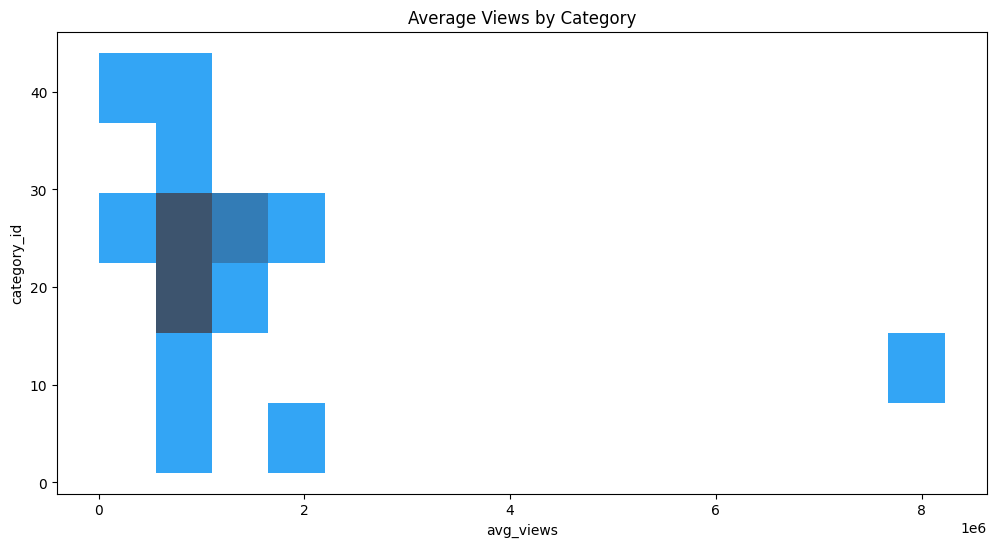

In [9]:
# Visualization
plt.figure(figsize=(12, 6))
sns.histplot(data=category_avg_views, x='avg_views', y='category_id')
plt.title('Average Views by Category')
plt.show()
